In [ ]:
#basic needs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.tree import plot_tree

1. Dropping the columns

In [ ]:
df = pd.read_csv('data1.csv', skipinitialspace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 32561 non-null  int64 
 1   Work Class          32561 non-null  object
 2   idk                 32561 non-null  int64 
 3   education-num       32561 non-null  int64 
 4   marital-status      32561 non-null  object
 5   Occupation          32561 non-null  int64 
 6   Relationship Satus  32561 non-null  object
 7   Race                32561 non-null  object
 8   Gender              32561 non-null  object
 9   capital-gain        32561 non-null  int64 
 10  capital-loss        32561 non-null  int64 
 11  hours-per-week      32561 non-null  int64 
 12  target              32561 non-null  object
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


In [ ]:
df.shape

(32561, 13)

In [ ]:
df.isnull().any()

Age                   False
Work Class            False
idk                   False
education-num         False
marital-status        False
Occupation            False
Relationship Satus    False
Race                  False
Gender                False
capital-gain          False
capital-loss          False
hours-per-week        False
target                False
dtype: bool

In [ ]:
df.drop(columns = ['education', 'native-country'], inplace = True)

In [ ]:
df.rename(columns = {'age': 'Age', 'workclass': 'Work Class', 'fnlwgt': 'idk', 'occupation': 'Occupation', 'relationship': 'Relationship Satus', 'race': 'Race', 'sex': 'Gender'}, inplace = True)

In [ ]:
#juist checking if the coulmns have actually been dropped
df.head()

,Age,Work Class,idk,education-num,marital-status,Occupation,Relationship Satus,Race,Gender,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [ ]:
df['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

2. Combining occupations into 5 classes


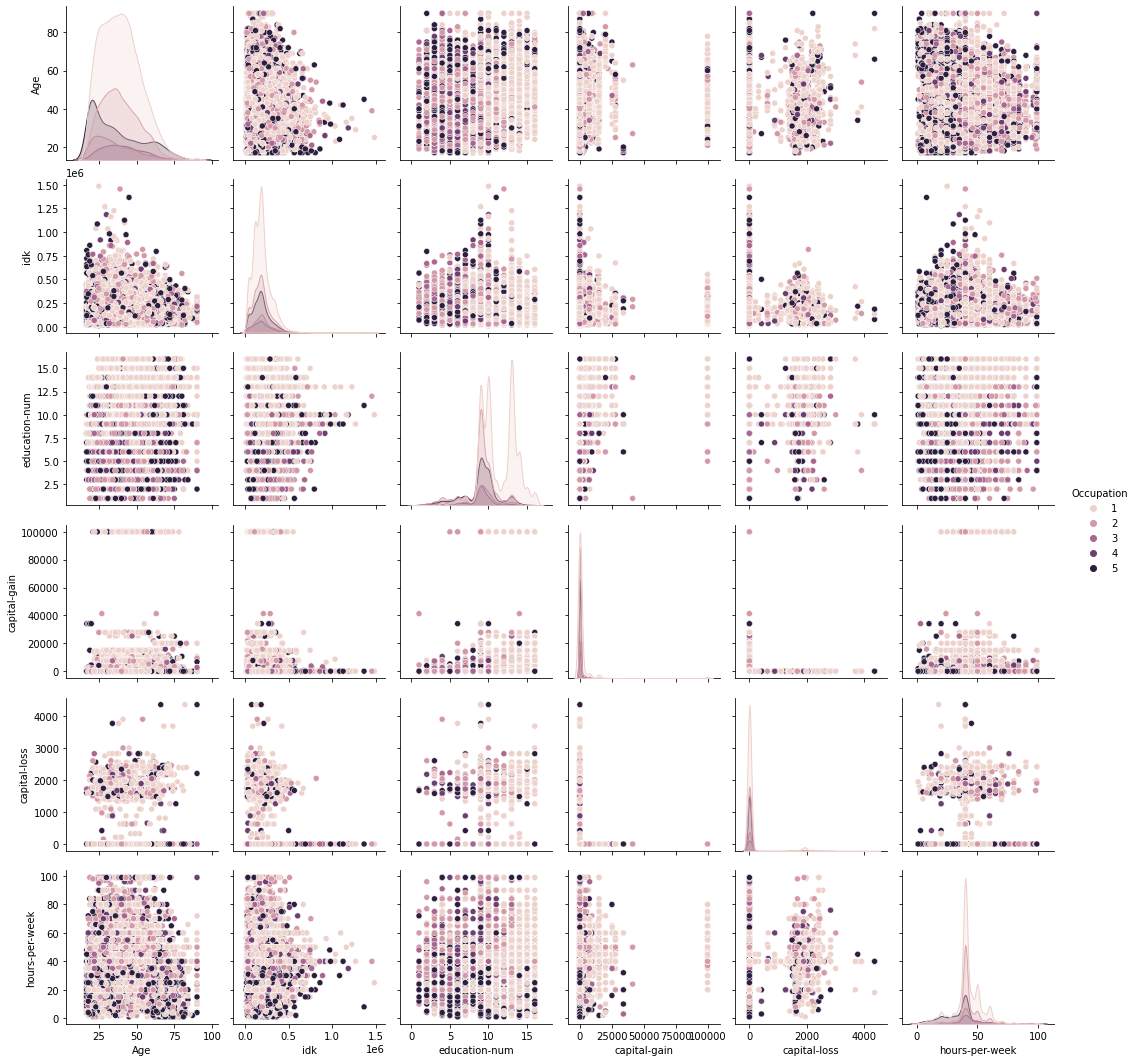

In [ ]:
sns.pairplot(data = df, hue = 'Occupation')

office job = 1
manoval job = 2
other services= 5
PUBLIC SERVICES = 4
private services = 3

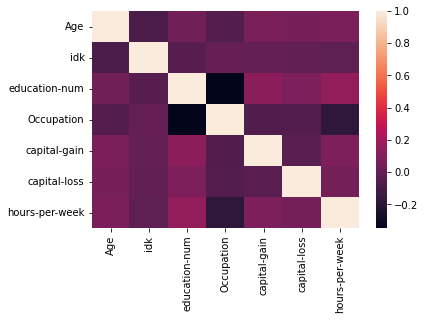

In [ ]:
sns.heatmap(df.corr())
#from the underneath map we can observe how
#there seems to be really high inverse correlation between occupation and hours per week
#and between occupation and education number

In [ ]:
df.replace(['Adm-clerical'], 1 , inplace = True)
df.replace(['Prof-specialty'],1 , inplace = True)
df.replace(['Craft-repair'], 2 , inplace = True)
df.replace(['Exec-managerial'], 1 , inplace = True)
df.replace(['Sales'],1, inplace = True)
df.replace(['Other-service'], 5 , inplace = True)
df.replace(['?'],5 , inplace = True)
df.replace(['Transport-moving'],4, inplace = True)
df.replace(['Handlers-cleaners'],3, inplace = True)
df.replace(['Tech-support'],1, inplace = True)
df.replace(['Farming-fishing'], 2 , inplace = True)
df.replace(['Protective-serv'],3 , inplace = True)
df.replace(['Priv-house-serv'],3 , inplace = True)
df.replace(['Armed-Forces'],5 , inplace = True)
df.replace(['Machine-op-inspct'],2 , inplace = True)
df


#we could also do an encoding as following in the code

,Age,Work Class,idk,education-num,marital-status,Occupation,Relationship Satus,Race,Gender,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,1,Not-in-family,White,0,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,1,Husband,White,0,0,0,13,<=50K
2,38,Private,215646,9,Divorced,3,Not-in-family,White,0,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,3,Husband,Black,0,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,1,Wife,Black,1,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,1,Wife,White,1,0,0,38,<=50K
32557,40,Private,154374,9,Married-civ-spouse,2,Husband,White,0,0,0,40,>50K
32558,58,Private,151910,9,Widowed,1,Unmarried,White,1,0,0,40,<=50K
32559,22,Private,201490,9,Never-married,1,Own-child,White,0,0,0,20,<=50K


In [ ]:
df.fillna( 'nd', inplace= True)

In [ ]:
df['Occupation'].value_counts()

1    16554
2     7095
5     5147
3     2168
4     1597
Name: Occupation, dtype: int64

#Divide into train 70% and validation 30%,  seed number 123

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.7, random_state=123)
print(train_df['Occupation'].value_counts())
print(val_df['Occupation'].value_counts())

1    4963
2    2106
5    1564
3     650
4     485
Name: Occupation, dtype: int64
1    11591
2     4989
5     3583
3     1518
4     1112
Name: Occupation, dtype: int64


#Applying Tree

In [ ]:
#in order to import the basics
from sklearn import datasets, metrics, tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

import numpy as np

In [ ]:
target = df['hours-per-week']
df1 = df.copy()
df1 = df1.drop('hours-per-week', axis =1)
x = df1
x.shape

(32561, 12)

In [ ]:
target

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 32561, dtype: int64

In [ ]:
#label encoding

le = LabelEncoder()
target = le.fit_transform(target)
target


#in order to follow
y = target
y.shape

(32561,)

In [ ]:
le.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state = 123)
print("Training split input- ", x_train.shape)
print("Testing split input- ", y_test.shape)

TypeError: ignored

In [ ]:
dtree = DecisionTreeClassifier
dtree.fit(x_train, y_train)
print('Decision Tree Classifier Created')

In [ ]:
df

,Age,Work Class,idk,education-num,marital-status,Occupation,Relationship Satus,Race,Gender,capital-gain,capital-loss,hours-per-week,target
0,39,State-gov,77516,13,Never-married,1,Not-in-family,White,nan,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,1,Husband,White,nan,0,0,13,<=50K
2,38,Private,215646,9,Divorced,3,Not-in-family,White,nan,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,3,Husband,Black,nan,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,1,Wife,Black,nan,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,1,Wife,White,nan,0,0,38,<=50K
32557,40,Private,154374,9,Married-civ-spouse,2,Husband,White,nan,0,0,40,>50K
32558,58,Private,151910,9,Widowed,1,Unmarried,White,nan,0,0,40,<=50K
32559,22,Private,201490,9,Never-married,1,Own-child,White,nan,0,0,20,<=50K


In [ ]:
y_train = [train_df['Occupation'], train_df['Age']]
X_train = [train_df['Occupation']]
X_train

[5047     4
 8048     1
 12776    1
 31314    5
 6894     2
         ..
 28636    1
 17730    1
 28030    2
 15725    4
 19966    5
 Name: Occupation, Length: 9768, dtype: int64]

In [ ]:
y_val = [val_df['Occupation'], val_df['Occupation']]
X_val = [val_df['Occupation']]
X_val

[20713    1
 13495    4
 12367    2
 22402    1
 18338    1
         ..
 15269    1
 16779    1
 22703    1
 11172    2
 23741    1
 Name: Occupation, Length: 22793, dtype: int64]

In [ ]:
clf = RandomForestClassifier(n_estimators=200,min_samples_split=15,
                             min_samples_leaf=8, max_features=4)
clf.fit(X_train,y_train)